In [15]:
import pandas as pd

In [16]:
# Load Skin data
Skin_data = pd.read_csv('D:/DMLab/Project/SkinData.csv')
# Load Skin Loadouts data
Skin_loadouts = pd.read_csv('D:/DMLab/Project/SkinLoadouts.csv')


In [17]:
pd.options.display.max_rows = 100
print(Skin_data.head(100))

              SkinName SkinType  BlastValue  DecemberValue
0         GammaDoppler    Knife      1997.0         1749.0
1                 Lore    Knife      1999.0         1600.0
2              Doppler    Knife      1992.0         1735.0
3            BKDoppler    Knife      3238.0         1725.0
4            M9Doppler    Knife      1553.0         1780.0
5       M9GammaDoppler    Knife      2153.0         1800.0
6               M9Fade    Knife      1902.0         1615.0
7       BKGammaDoppler    Knife      3153.0         1600.0
8               BKFade    Knife      3681.0         3230.0
9           MarbleFade    Knife      1750.0         1357.0
10       BlackLaminate    Knife      1391.0         1185.0
11           TKDoppler    Knife      1180.0          939.0
12           Slaughter    Knife      1718.0         1272.0
13       KCaseHardened    Knife      1885.0         1459.0
14          BKFreehand    Knife      1238.0         1015.0
15         BKScorcheed    Knife      1115.0         1000

In [21]:
pd.options.display.max_rows = 100
print(Skin_loadouts.head(100))

           Pro         Team  Rank           Knife          Gloves  \
0         donk       Spirit     1    GammaDoppler       HedgeMaze   
1      chopper       Spirit     1             NaN            Fade   
2       magixx       Spirit     1    GammaDoppler       HedgeMaze   
3        sh1ro       Spirit     1            Lore   CrimsonKimono   
4       zont1x       Spirit     1         Doppler      Amphibious   
5        ZywOo     Vitality     2       BKDoppler       HedgeMaze   
6         apEX     Vitality     2       M9Doppler            Fade   
7       flameZ     Vitality     2  M9GammaDoppler       KingSnake   
8        mezii     Vitality     2       M9Doppler       KingSnake   
9         ropz     Vitality     2         Doppler   CrimsonKimono   
10          jL         NaVi     3    GammaDoppler            Vice   
11     Aleksib         NaVi     3          M9Fade       Spearmint   
12         b1t         NaVi     3       BKDoppler   CrimsonKimono   
13          iM         NaVi     3 

In [18]:
from scipy.stats import ttest_rel

# Perform a paired t-test (BlastValue vs. DecemberValue)
t_stat, p_value = ttest_rel(Skin_data["BlastValue"], Skin_data["DecemberValue"])

# Print results
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")


T-statistic: 2.4882794192967097
P-value: 0.014741814343621283


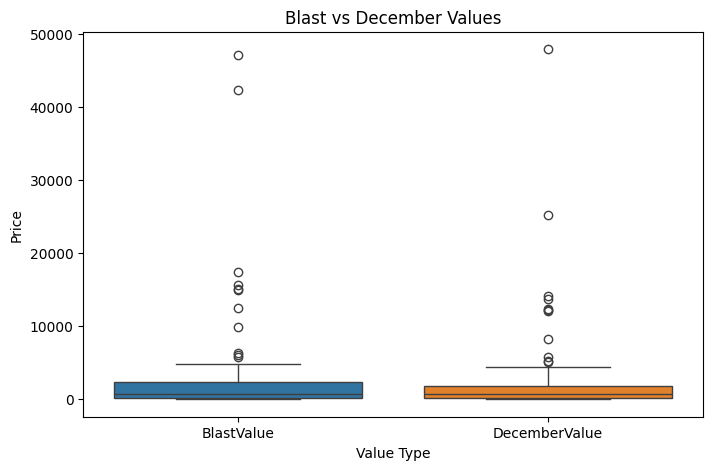

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a box plot
plt.figure(figsize=(8, 5))
sns.boxplot(data=Skin_data[["BlastValue", "DecemberValue"]])

# Labels and title
plt.xlabel("Value Type")
plt.ylabel("Price")
plt.title("Blast vs December Values")
plt.show()


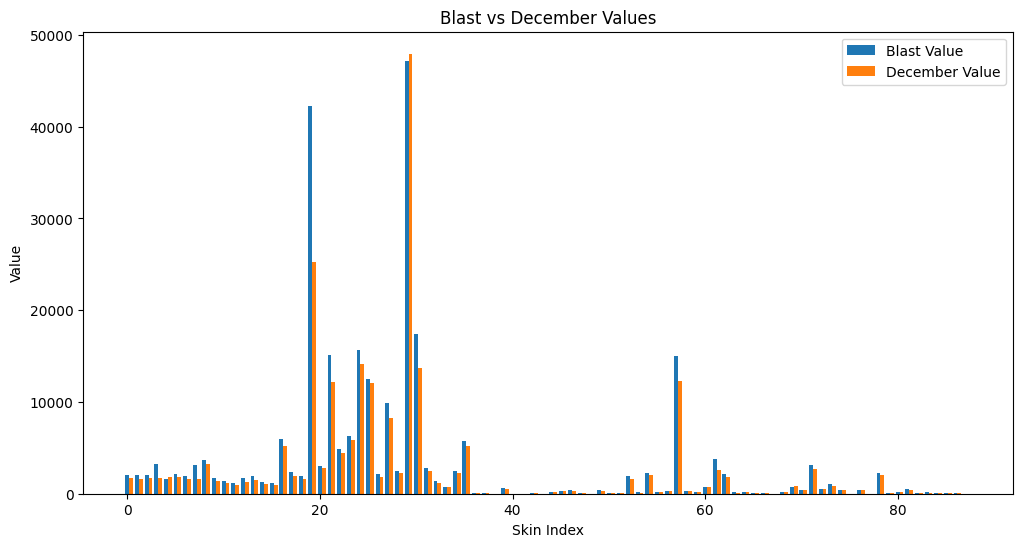

In [19]:
import numpy as np

# Bar width
bar_width = 0.4
index = np.arange(len(Skin_data))

plt.figure(figsize=(12, 6))
plt.bar(index, Skin_data["BlastValue"], bar_width, label="Blast Value")
plt.bar(index + bar_width, Skin_data["DecemberValue"], bar_width, label="December Value")

# Labels
plt.xlabel("Skin Index")
plt.ylabel("Value")
plt.title("Blast vs December Values")
plt.legend()
plt.show()


C:\Users\Adrian\AppData\Local\Temp\ipykernel_27076\1931742399.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=skin_type_changes, x="SkinType", y="Percentage Increase", palette="viridis")


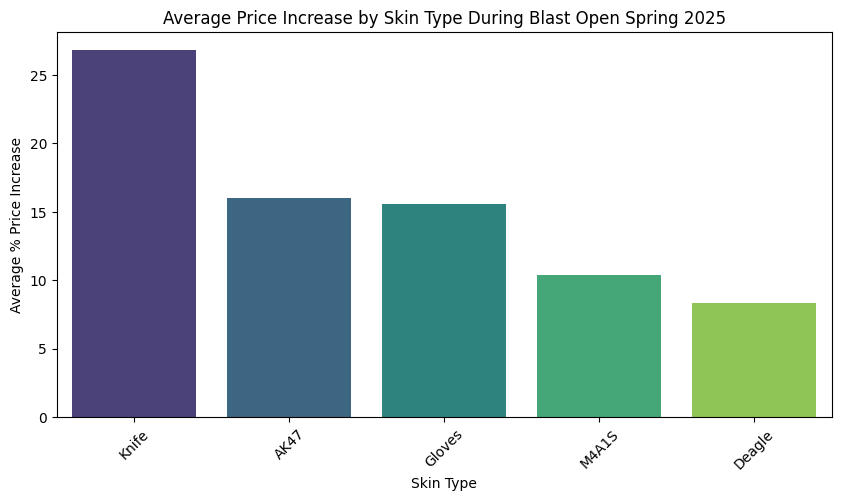

In [20]:
# Calculate the percentage increase for each skin
Skin_data["Percentage Increase"] = ((Skin_data["BlastValue"] - Skin_data["DecemberValue"]) / Skin_data["DecemberValue"]) * 100

# Group by SkinType and calculate the average percentage increase
skin_type_changes = Skin_data.groupby("SkinType")["Percentage Increase"].mean().reset_index()

# Sort values for better visualization
skin_type_changes = skin_type_changes.sort_values(by="Percentage Increase", ascending=False)

# Plot the results
plt.figure(figsize=(10, 5))
sns.barplot(data=skin_type_changes, x="SkinType", y="Percentage Increase", palette="viridis")

# Labels and title
plt.xlabel("Skin Type")
plt.ylabel("Average % Price Increase")
plt.title("Average Price Increase by Skin Type During Blast Open Spring 2025")
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()


In [26]:
# Convert SkinLoadouts from wide format (Knife, Gloves, etc.) to long format
skin_columns = ["Knife", "Gloves", "Deagle", "AK47", "M4A1S"]  # Add all relevant weapon columns
Skin_usage = Skin_loadouts[skin_columns].melt(value_name="SkinName", var_name="WeaponType").dropna()

# Count how many times each skin was used
usage_counts = Skin_usage["SkinName"].value_counts().reset_index()
usage_counts.columns = ["SkinName", "UsageCount"]

# Merge usage count with SkinData
Skin_data = Skin_data.merge(usage_counts, on="SkinName", how="left")

# Fill missing values (if some skins were not used by any team)
Skin_data["UsageCount"].fillna(0, inplace=True)



C:\Users\Adrian\AppData\Local\Temp\ipykernel_27076\2377725315.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  Skin_data["UsageCount"].fillna(0, inplace=True)


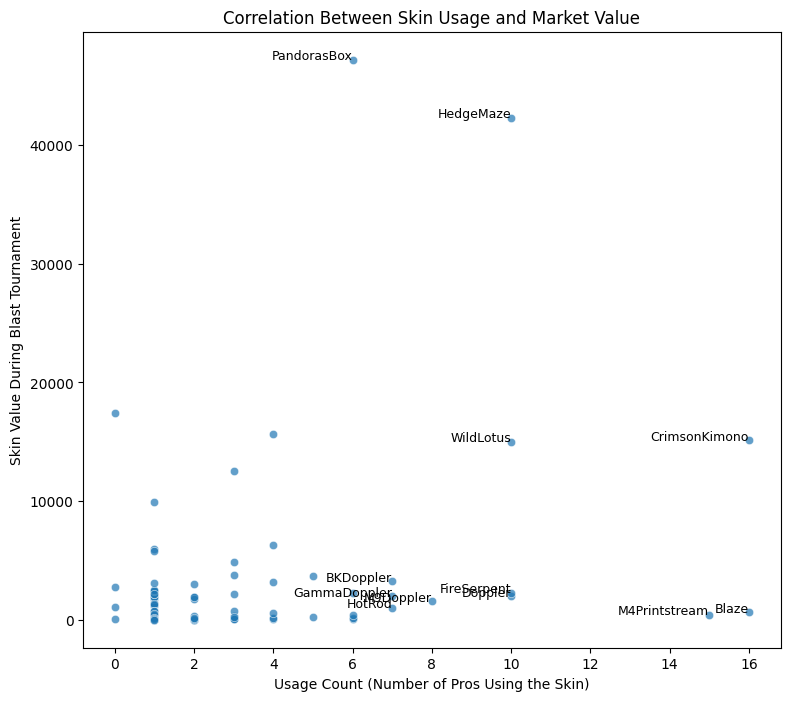

Pearson Correlation: 0.2964
P-value: 0.0051


In [43]:
# Scatter plot with Blast Value on the y-axis
plt.figure(figsize=(9, 8))
sns.scatterplot(data=Skin_data, x="UsageCount", y="BlastValue", alpha=0.7)

# Labels and title
plt.xlabel("Usage Count (Number of Pros Using the Skin)")
plt.ylabel("Skin Value During Blast Tournament")
plt.title("Correlation Between Skin Usage and Market Value")

# Highlight key points (e.g., top 12 most used skins)
top_skins = Skin_data.nlargest(12, "UsageCount")  # Get top 12 most used skins

for _, row in top_skins.iterrows():
    plt.text(row["UsageCount"], row["BlastValue"], row["SkinName"], fontsize=9, ha='right')

plt.show()

# Pearson correlation test
correlation, p_value = pearsonr(Skin_data["UsageCount"], Skin_data["BlastValue"])

print(f"Pearson Correlation: {correlation:.4f}")
print(f"P-value: {p_value:.4f}")
